In [1]:
%run style_and_packages.ipynb

# Beispiel: Eigenvektoren und Nachgiebigkeitsmatrix

## Aufgabenstellung

Das System in @fig-mms_nach_system zeigt einen Rahmen, welcher als Zweimassenschwinger modelliert werden kann.


![Statisches System des 2-Massenschwingers](bilder/aufgabe_mms_nach_system.svg){#fig-mms_nach_system}

Gesucht:

-  Eigenkreisfrequenz $\omega$ 
-  Eigenformen - Normierung auf 
$$\phi_1^T = 
\begin{bmatrix}
1 &  \\
\end{bmatrix} $$
$$\phi_2^T =
\begin{bmatrix}
 & 1 \\
\end{bmatrix}$$

- Skizze der Eigenformen 
- Kontrolle der Orthogonalitätsbedingung

Gegeben:

- Biegesteifigkeit aller Stäbe $E\cdot I = 20\cdot 10^{12} \text{Nmm}^2$
- Dehnsteifigkeit aller Stäbe $E\cdot A = \infty$
- Einzelmassen $M_1 = 1000 \text{kg}$ und $M_2 = 1000 \text{kg}$
- Länge $L = 4000 \text{mm}$

{{< pagebreak >}}
## Musterlösung

In [2]:
#| label: tbl-parameter_mms1
#| tbl-cap: Verwendete Parameter

params = {'EI': 20*10**12 *unit.N*unit.mm**2,
          'M_1':1000*unit.N*unit.second**2/unit.m,
          'M_2':1000*unit.N*unit.second**2/unit.m,
          'L':4*unit.m,
          }

          
render.dict_to_table(params)

| Parameter |  |
|---|---|
| $EI = 20000000000000 \text{mm}^{2} \text{N}$ | $L = 4 \text{m}$ |
| $M_{1} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ | $M_{2} = \frac{1000 \text{N} \text{s}^{2}}{\text{m}}$ |


In [3]:
omega, t,  L, M_1, M_2, EI = sp.symbols('omega, t,  L, M_1, M_2, EI')

omega_n = sp.symbols('omega_n')

### Nachgiebigkeitsmatrix $\mathbf{D}$ {#sec-mms_nach_nachgiebigkeit}

Die Steifigkeitsmatrix lässt sich durch Invertierung der Nachgiebigkeitsmatrix beschreiben. Die Nachgiebigkeitsmatrix $\mathbf{D}$ beschreibt die Deformation an einem Massenpunkt. Die Einträge der $\mathbf{D}$ - Matrix beschreiben die Deformationen für unterschiedliche Laststellungen.

$$
\mathbf{K} = \mathbf{D^{-1}}
$${#eq-mms_nach_invert_K}

![Balken mit 2 Einzelmassen](bilder/aufgabe_mms_nach_beispielbalken.svg){#fig-mms_nach_2mms}

Für einen 2-Massenschwinger, wie in @fig-mms_nach_2mms , hat die Nachgiebigkeitsmatrix folgende Form:

$$
\mathbf{D} = \frac{1}{EI}\cdot \begin{bmatrix}
\delta_{11} & \delta_{12}\\
\delta_{21} & \delta_{22} 
\end{bmatrix}
$${#eq-mms_nach_nachgiebigkeitsmatrix}

wobei gilt:

$\delta_{ab}$ : $a$ ist die Lastsituation, $b$ ist die Masse.


#### Anwendung 

![Schnittgrössen für den ersten Lastfall zur Bestimmung der Deformation](bilder/aufgabe_mms_nach_schnittgroessen1.svg){#fig-mms_nach_schnittgrössen1}

$$
\delta_{ab} = \frac{1}{EI}\int_{0}^{L} M_a\bar{M_b} \,dx
$${#eq-mms_nach_deformation}

Es werden 2 Laststellungen betrachtet, jeweils an einem Massenpunkt. Dabei ist Beachtung der Einheit der Einwirkung zu schenken. Diese wird einheitslos angesetzt.

![Schnittgrössen für den zweiten Lastfall zur Bestimmung der Deformation](bilder/aufgabe_mms_nach_schnittgroessen2.svg){#fig-mms_nach_schnittgrössen2}



In [4]:
delta_11 = 1/(EI) * (sp.Rational(1,3) * -L*-L*1*L)* 2
delta_12 = 1/(EI) * ((sp.Rational(1,3) * -L*-L*1*L) + (sp.Rational(1,2) * -L*-L*1*L))
delta_21 = delta_12
delta_22 = 1/(EI) * ((sp.Rational(1,3) * -L*-L*1*L)* 2 + -L*-L*1*L)

render.eq_display('delta_11', delta_11,
                  'delta_12', delta_12,
                  'delta_21', delta_21,
                  'delta_22', delta_22)


         3
      2⋅L 
δ₁₁ = ────
      3⋅EI

         3
      5⋅L 
δ₁₂ = ────
      6⋅EI

         3
      5⋅L 
δ₂₁ = ────
      6⋅EI

         3
      5⋅L 
δ₂₂ = ────
      3⋅EI

In [5]:
D = sp.Matrix([[delta_11, delta_12],[delta_21, delta_22]])
K = D.inv()
render.eq_display(sp.MatrixSymbol('D', 2,2), D,
                  sp.MatrixSymbol('K', 2,2), K)

    ⎡   3     3⎤
    ⎢2⋅L   5⋅L ⎥
    ⎢────  ────⎥
    ⎢3⋅EI  6⋅EI⎥
D = ⎢          ⎥
    ⎢   3     3⎥
    ⎢5⋅L   5⋅L ⎥
    ⎢────  ────⎥
    ⎣6⋅EI  3⋅EI⎦

    ⎡ 4⋅EI   -2⋅EI ⎤
    ⎢ ────   ──────⎥
    ⎢   3       3  ⎥
    ⎢  L       L   ⎥
K = ⎢              ⎥
    ⎢-2⋅EI    8⋅EI ⎥
    ⎢──────   ──── ⎥
    ⎢   3        3 ⎥
    ⎣  L      5⋅L  ⎦

### Eigenvektoren

Die Bewegungsgleichung für einen ungedämpften, frei schwingenden Mehrmassenschwinger lässt sich folgender massen aufstellen:

$$
\mathbf{M u''(t) + K u(t)} = 0
$${#eq-mms_nach_bewegungsgleichung}

Die Modale Analyse entkoppelt die Gleichungen um diese unabhängig von einander zu lösen.

#### Massenmatrix $\mathbf{M}$

In [6]:
M = sp.Matrix([[M_1,0],[0,M_2]])

render.eq_display(sp.MatrixSymbol('M',2,2), M)

    ⎡M₁  0 ⎤
M = ⎢      ⎥
    ⎣0   M₂⎦

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand @eq-mms_nach_eigenkreisfrequenzen bestimmen:

$$
\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}
$${#eq-mms_nach_eigenkreisfrequenzen}

In [7]:
eq_omega = sp.det(K-omega_n**2*M)

omega_n_solve = sp.solve(eq_omega, omega_n)
omega_1 = omega_n_solve[1]
omega_2 = omega_n_solve[3]

render.eq_display('omega_1', omega_1.subs(params).simplify().evalf(3),
                  'omega_2', omega_2.subs(params).simplify().evalf(3))

      12.1 
ω₁ = ──────
     second

      40.0 
ω₂ = ──────
     second

#### Eigenvektoren $\phi$

$$
\phi_n = \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
$${#eq-mms_nach_eigenvektor}

$$
[\mathbf{K}-\omega_n^2 \mathbf{M}]\cdot \begin{bmatrix}
\phi_{1n}\\
\phi_{2n} 
\end{bmatrix}
=0
$${#eq-mms_nach_eigenvektor_bestimmung}



Dazu ist die entsprechende Normierung aus der Aufgabenstellung zu berücksichtigen. Generell gilt, den Vektor auf den Maximalwert zu normieren, bzw. diesen auf 1 zu setzen.

In [8]:
phi_11, phi_21, phi_12, phi_22 = sp.symbols('phi_11, phi_21, phi_12, phi_22')
params['phi_21'] = 1

phi_1 = sp.Matrix([[phi_11], [phi_21]])

phi_11 = list(sp.solve((K-omega_1**2 *M)*phi_1, phi_11).values())[0]

params['phi_11'] = phi_11.subs(params).simplify() 




render.eq_display((K-omega_1**2 *M)*phi_1,sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))


⎡                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₂₁       ⎜4⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅M₁  + 5⋅M₁⋅M₂ + 25⋅
⎢- ──────── + φ₁₁⋅⎜──── - M₁⋅⎜─────── + ───── - ──────────────────────────────
⎢      3          ⎜  3       ⎜   3       3                     3              
⎢     L           ⎝ L        ⎝5⋅L ⋅M₂   L ⋅M₁               5⋅L ⋅M₁⋅M₂        
⎢                                                                             
⎢                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₁₁       ⎜8⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅M₁  + 5⋅M₁⋅M₂ + 25⋅
⎢- ──────── + φ₂₁⋅⎜──── - M₂⋅⎜─────── + ───── - ──────────────────────────────
⎢      3          ⎜   3      ⎜   3       3                     3              
⎣     L           ⎝5⋅L       ⎝5⋅L ⋅M₂   L ⋅M₁       

     ⎡0.566⎤
φ₁ = ⎢     ⎥
     ⎣ 1.0 ⎦

In [9]:
params['phi_12'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_22 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_22).values())[0]

params['phi_22'] = phi_22.subs(params).simplify() 




render.eq_display((K-omega_2**2 *M)*phi_2,sp.Matrix([[0],[0]]),
                  sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))


⎡                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₂₂       ⎜4⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅M₁  + 5⋅M₁⋅M₂ + 25⋅
⎢- ──────── + φ₁₂⋅⎜──── - M₁⋅⎜─────── + ───── + ──────────────────────────────
⎢      3          ⎜  3       ⎜   3       3                     3              
⎢     L           ⎝ L        ⎝5⋅L ⋅M₂   L ⋅M₁               5⋅L ⋅M₁⋅M₂        
⎢                                                                             
⎢                 ⎛          ⎛                          ______________________
⎢                 ⎜          ⎜                         ╱     2                
⎢  2⋅EI⋅φ₁₂       ⎜8⋅EI      ⎜  4⋅EI     2⋅EI   2⋅EI⋅╲╱  4⋅M₁  + 5⋅M₁⋅M₂ + 25⋅
⎢- ──────── + φ₂₂⋅⎜──── - M₂⋅⎜─────── + ───── + ──────────────────────────────
⎢      3          ⎜   3      ⎜   3       3                     3              
⎣     L           ⎝5⋅L       ⎝5⋅L ⋅M₂   L ⋅M₁       

     ⎡ 1.0  ⎤
φ₂ = ⎢      ⎥
     ⎣-0.566⎦

#### Orthogonalitätsbedingung{#sec-mms_nach_ortho}

Um eine modale Analyse des Systems durchzuführen, gilt es die Orthogonalität der Eigenvektoren zu gewährleisten. Die modale Analyse wird in folgenden Beispielen angewendet.


Dies gilt es für die Massenmatrix zu kontrollieren:

In [10]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_1.T*M*phi_1).subs(params).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_2.T*M*phi_2).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_1',2,1),(phi_2.T*M*phi_1).subs(params).evalf(3),

                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('M', 2,2)*sp.MatrixSymbol('phi_2',2,1),(phi_1.T*M*phi_2).subs(params).evalf(3))

           ⎡                     2⎤
  T        ⎢1.32e+3⋅newton⋅second ⎥
φ₁ ⋅M⋅φ₁ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

           ⎡                     2⎤
  T        ⎢1.32e+3⋅newton⋅second ⎥
φ₂ ⋅M⋅φ₂ = ⎢──────────────────────⎥
           ⎣        meter         ⎦

  T           
φ₂ ⋅M⋅φ₁ = [0]

  T           
φ₁ ⋅M⋅φ₂ = [0]


Sowohl auch für die Steifigkeitsmatrix:



In [11]:
render.eq_display(sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_1.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_2.T*K*phi_2).subs(params)).evalf(3),

                  sp.MatrixSymbol('phi_2',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_1',2,1),sp.simplify((phi_2.T*K*phi_1).subs(params)).evalf(3),
                  
                  sp.MatrixSymbol('phi_1',2,1).T*sp.MatrixSymbol('K', 2,2)*sp.MatrixSymbol('phi_2',2,1),sp.simplify((phi_1.T*K*phi_2).subs(params)).evalf(3))

  T        ⎡1.93e+5⋅newton⎤
φ₁ ⋅K⋅φ₁ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T        ⎡2.12e+6⋅newton⎤
φ₂ ⋅K⋅φ₂ = ⎢──────────────⎥
           ⎣    meter     ⎦

  T           
φ₂ ⋅K⋅φ₁ = [0]

  T           
φ₁ ⋅K⋅φ₂ = [0]

Die Orthogonalitätsbedingung ist erfüllt!

Zur effektiven Entkoppelung der Gleichungen muss die Orthogonalitätsbedingung eingehalten sein. Durch die Orthogonalität der Vektoren $\phi_1$ und $\phi_2$ kann mittels einem Einmassenschwingers sämtliches Verhalten von $\phi_1$ beschrieben werden und mittels einem zweiten Einmassenschwinger sämtliches Verhalten von $\phi_2$. Ist die Orthogonalität nicht gegeben, so müsste der erste Einmassenschwinger Anteile aus $\phi_1$ und $\phi_2$ beschreiben. 

In [12]:
phi_1_x = [0,phi_1.subs(params)[0]]
phi_1_y = [0,phi_1.subs(params)[1]]

phi_2_x = [0,phi_2.subs(params)[0]]
phi_2_y = [0,phi_2.subs(params)[1]]


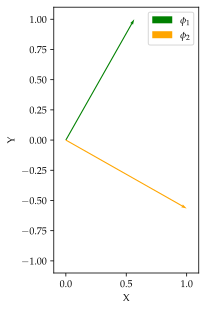

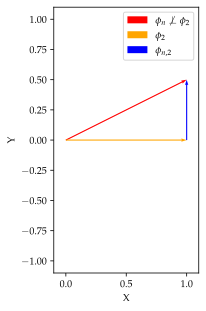

In [13]:
#| label: fig-ems_nach_ortho
#| fig-cap: "Visualisierung des Einflusses der Orthogonalität der Eigenvektoren"
#| fig-subcap: 
#|   - "Erfüllte Orthogonalitätsbedingung"
#|   - "Nicht erfüllte Orthogonalitätsbedingung"
#| layout-ncol: 2

# Define the vector
vector_phi_1 = np.array(phi_1.T.subs(params)).astype(np.float64)[0]
vector_phi_2 = np.array(phi_2.T.subs(params)).astype(np.float64)[0]

# Create a quiver plot
fig, ax = plt.subplots()
ax.quiver(0, 0, vector_phi_1[0], vector_phi_1[1], angles='xy', scale_units='xy', scale=1, color='green', label='$\phi_1$')
ax.quiver(0, 0, vector_phi_2[0], vector_phi_2[1], angles='xy', scale_units='xy', scale=1, color='orange', label='$\phi_2$')

# Set the axis limits
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-1.1, 1.1])

ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
plt.show()


## Zweiter Plot

# rotatet orthogonal vectors
v1 = np.array([0,1])
v2 = np.array([1,0])

# Define the non-orthogonal vectors
u1 = np.array([1., 0.5])

# Create a quiver plot
fig, ax = plt.subplots()
ax.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='red', label='$\phi_n \\not \\perp \phi_2$')
ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='orange', label='$\phi_2$')
ax.quiver(v2[0], v2[1], 0, u1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='$\phi_{n,2}$')


# Add lines to show the decomposition of the non-orthogonal vector




# Set the axis limits
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-1.1, 1.1])

ax.set_aspect('equal')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.legend()
plt.show()


Wie in @fig-ems_nach_ortho dargestellt, wird der rote Vektor $\phi_n$ durch den orangenen Vektor $\phi_2$ beschrieben, sowie durch seine $Y$ Komponente $\phi_{n,2}$. Folglich steht $\phi_n$ nicht orthogonal auf $\phi_2$ und lässt sich nicht ohne $\phi_2$ beschreiben. Die Entkoppelung ist nicht möglich. 


Nebenbei, dies lässt sich für einen zweidimensionalen Fall, sprich Zweimassenschwinger darstellen. Das Verfahren kann auf beliebig viele Dimensionen erweitert werden, die Darstellung dieser ist jedoch nicht mehr möglich.

### Eigenformen



![Die beiden Eigenform skizziert](bilder/aufgabe_mms_nach_eigenvekt1.svg){#fig-mms_nach_eigenformen}

